In [5]:
import sys
sys.version
sys.path.append('/Users/maggiori/anaconda/envs/py35/lib/python3.5/site-packages') # py35 libraries

'3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

In [16]:
from sklearn.neighbors import KernelDensity

from scipy.stats.distributions import norm
import time
import numpy as np
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

**Changing kernel**

In [17]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """
    Kernel Density Estimation with Scikit-learn
    Source: http://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
    """
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [18]:
# draw points from a bimodal distribution in 1D
N = 100000

np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(int(0.8 * N)),
                    norm(1, 0.3).rvs(int(0.2 * N))])

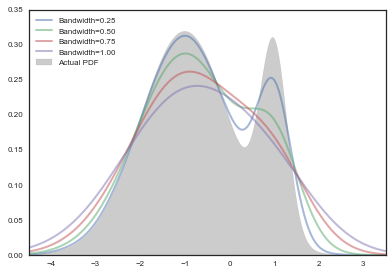

In [28]:
# effect of changing bandwidth
x_grid = np.linspace(-4.5, 3.5, 1000)
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

palette = itertools.cycle(sns.color_palette())
plt.fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4, label='Actual PDF')
for bw in np.arange(0.25, 1.25, 0.25):
    pdf = kde_sklearn(x, x_grid, bandwidth=bw, kernel='gaussian')
    plt.plot(x_grid, pdf, color=next(palette), alpha=0.5, lw=2, label='Bandwidth={:.2f}'.format(bw))
plt.legend(loc="upper left")
plt.xlim(-4.5, 3.5);

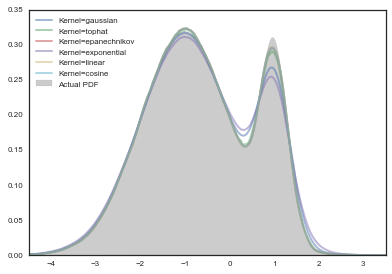

In [29]:
# effect of changing kernel
x_grid = np.linspace(-4.5, 3.5, 1000)
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

palette = itertools.cycle(sns.color_palette())
plt.fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4, label='Actual PDF')
for k in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    pdf = kde_sklearn(x, x_grid, bandwidth=0.2, kernel=k)
    plt.plot(x_grid, pdf, color=next(palette), alpha=0.5, lw=2, label='Kernel='+k)
plt.legend(loc="upper left")
plt.xlim(-4.5, 3.5);